In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [153]:
import torch
import torch.nn as nn
import torch.optim as optim

In a generalized linear model, $h$ is a link function and $T$ is an affine map (that is, a linear regressor). We set $g = h^{-1} \circ T$ to be our generalized linear model.

In [154]:
h = np.vectorize(lambda x : - 1/x) # modify h as needed
h_inv = np.vectorize(lambda x : -1/x)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [156]:
df = pd.read_csv("./data_synthetic/synth_data_1var_exp.csv", index_col=0)
df

,X,y
0,0.000000,0.555041
1,0.067114,0.488022
2,0.134228,0.472649
3,0.201342,0.495478
4,0.268456,0.486232
...,...,...
145,9.731544,0.022817
146,9.798658,0.076458
147,9.865772,0.028670
148,9.932886,0.065511


In [157]:
X = df["X"].to_numpy().reshape(-1, 1)
y = df["y"].to_numpy().reshape(-1, 1)

y_transformed = h(y)

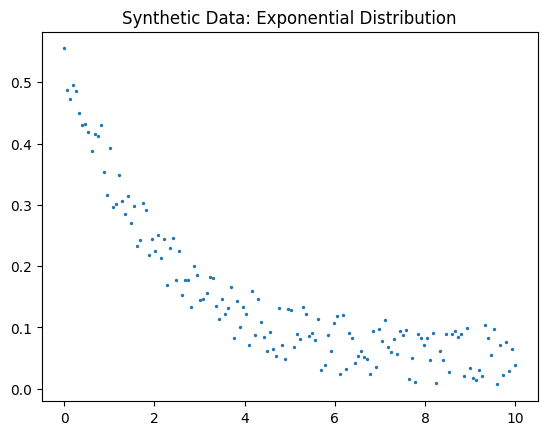

In [158]:
plt.scatter(X,y,s=2)
plt.title("Synthetic Data: Exponential Distribution")
plt.show()

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
regr = LinearRegression()
regr.fit(X_train, h(y_train))

y_pred = h_inv(regr.predict(X_test))

print(f"Coefficients: \n", regr.coef_)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Coefficients: 
 [[-3.02123822]]
Mean squared error: 0.032267647389185625
Coefficient of determination: -1.3927411826705653


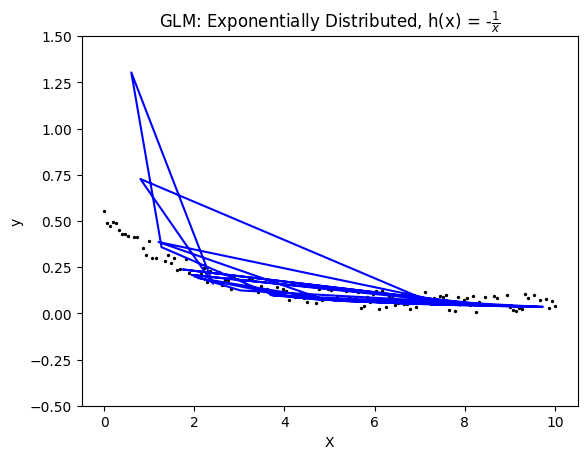

In [161]:
plt.scatter(X_train, y_train, color="black",s=2)
plt.plot(X_test, y_pred, color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.ylim(-0.5,1.5)
plt.title(r"GLM: Exponentially Distributed, h(x) = -$\frac{1}{x}$")
plt.show()